In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prices_2 = pd.read_csv('prices_round_3_day_2.csv', sep=';')
prices_1 = pd.read_csv('prices_round_3_day_1.csv', sep=';')
prices_0 = pd.read_csv('prices_round_3_day_0.csv', sep=';')

trades_2 = pd.read_csv('trades_round_3_day_2_nn.csv', sep=';')
trades_1 = pd.read_csv('trades_round_3_day_1_nn.csv', sep=';')
trades_0 = pd.read_csv('trades_round_3_day_0_nn.csv', sep=';')

In [5]:
df = pd.concat([prices_2, prices_1, prices_0]).reset_index(drop=True)

In [6]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ROSES,14421,27,14420.0,35.0,NaN,NaN,14422,62,NaN,NaN,NaN,NaN,14421.5,0.0
1,2,0,STRAWBERRIES,4036,255,NaN,NaN,NaN,NaN,4037,255,NaN,NaN,NaN,NaN,4036.5,0.0
2,2,0,CHOCOLATE,7888,123,NaN,NaN,NaN,NaN,7890,123,NaN,NaN,NaN,NaN,7889.0,0.0
3,2,0,GIFT_BASKET,70593,1,70592.0,10.0,70591.0,27.0,70604,1,70605.0,10.0,70606.0,27.0,70598.5,0.0
4,2,100,CHOCOLATE,7889,102,NaN,NaN,NaN,NaN,7890,48,7891.0,54.0,NaN,NaN,7889.5,0.0


In [9]:
df["product"].unique()

array(['ROSES', 'STRAWBERRIES', 'CHOCOLATE', 'GIFT_BASKET'], dtype=object)

In [10]:
rose_prices = df[df["product"] == "ROSES"].reset_index(drop=True)
berry_prices = df[df["product"] == "STRAWBERRIES"].reset_index(drop=True)
choco_prices = df[df["product"] == "CHOCOLATE"].reset_index(drop=True)
basket_prices = df[df["product"] == "GIFT_BASKET"].reset_index(drop=True)

In [50]:
def calc_vwap(prices_df):
    total_bid_volume = (
        prices_df["bid_volume_1"].fillna(0)
        + prices_df["bid_volume_2"].fillna(0)
        + prices_df["bid_volume_3"].fillna(0)
    )
    total_ask_volume = (
        prices_df["ask_volume_1"].fillna(0)
        + prices_df["ask_volume_2"].fillna(0)
        + prices_df["ask_volume_3"].fillna(0)
    )

    vwap = (
        prices_df["bid_price_1"].fillna(0) * prices_df["bid_volume_1"].fillna(0)
        + prices_df["bid_price_2"].fillna(0) * prices_df["bid_volume_2"].fillna(0)
        + prices_df["bid_price_3"].fillna(0) * prices_df["bid_volume_3"].fillna(0)
        + prices_df["ask_price_1"].fillna(0) * prices_df["ask_volume_1"].fillna(0)
        + prices_df["ask_price_2"].fillna(0) * prices_df["ask_volume_2"].fillna(0)
        + prices_df["ask_price_3"].fillna(0) * prices_df["ask_volume_3"].fillna(0)
    ) / (total_bid_volume + total_ask_volume)

    return vwap

In [51]:
rose_prices["vwap"] = calc_vwap(rose_prices)
berry_prices["vwap"] = calc_vwap(berry_prices)
choco_prices["vwap"] = calc_vwap(choco_prices)
basket_prices["vwap"] = calc_vwap(basket_prices)

In [52]:
cols = ["day", "timestamp", "mid_price", "vwap"]
merge1 = pd.merge(rose_prices[cols], choco_prices[cols], on=['day', 'timestamp'], how='inner', suffixes=('_rose', '_choco'))
merge2 = pd.merge(merge1, berry_prices[cols], on=['day', 'timestamp'], how='inner')
merge = pd.merge(merge2, basket_prices[cols], on=['day', 'timestamp'], how='inner', suffixes=('', '_basket'))

merge.rename(columns={"mid_price": "mid_price_berry", "vwap": "vwap_berry"}, inplace=True)
merge.head()

,day,timestamp,mid_price_rose,vwap_rose,mid_price_choco,vwap_choco,mid_price_berry,vwap_berry,mid_price_basket,vwap_basket
0,2,0,14421.5,14421.217742,7889.0,7889.000000,4036.5,4036.500000,70598.5,70598.500000
1,2,100,14424.0,14424.000000,7889.5,7889.764706,4036.5,4036.879464,70618.5,70615.481481
2,2,200,14422.5,14422.500000,7890.5,7890.276786,4037.0,4037.000000,70617.0,70617.185714
3,2,300,14421.5,14421.854839,7890.0,7890.000000,4037.0,4036.979253,70615.5,70615.500000
4,2,400,14422.0,14422.000000,7890.0,7890.000000,4037.0,4037.000000,70629.5,70629.500000


In [53]:
merge["sum_basket_price"] = (
    4 * merge["mid_price_choco"]
    + 6 * merge["mid_price_berry"]
    + 1 * merge["mid_price_rose"]
)
merge["sum_basket_vwap"] = (
    4 * merge["vwap_choco"]
    + 6 * merge["vwap_berry"]
    + 1 * merge["vwap_rose"]
)
merge.head()

,day,timestamp,mid_price_rose,vwap_rose,mid_price_choco,vwap_choco,mid_price_berry,vwap_berry,mid_price_basket,vwap_basket,sum_basket_price,sum_basket_vwap
0,2,0,14421.5,14421.217742,7889.0,7889.000000,4036.5,4036.500000,70598.5,70598.500000,70196.5,70196.217742
1,2,100,14424.0,14424.000000,7889.5,7889.764706,4036.5,4036.879464,70618.5,70615.481481,70201.0,70204.335609
2,2,200,14422.5,14422.500000,7890.5,7890.276786,4037.0,4037.000000,70617.0,70617.185714,70206.5,70205.607143
3,2,300,14421.5,14421.854839,7890.0,7890.000000,4037.0,4036.979253,70615.5,70615.500000,70203.5,70203.730357
4,2,400,14422.0,14422.000000,7890.0,7890.000000,4037.0,4037.000000,70629.5,70629.500000,70204.0,70204.000000


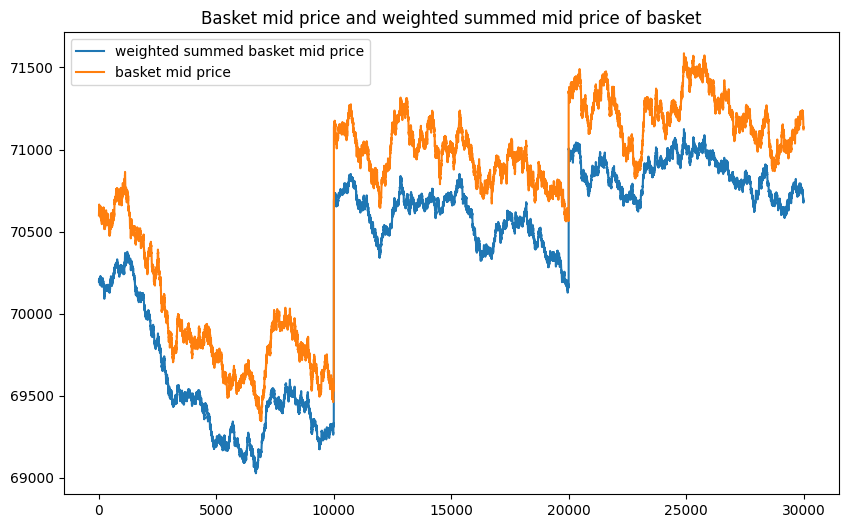

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(merge["sum_basket_price"], label="weighted summed basket mid price")
plt.plot(merge["mid_price_basket"], label="basket mid price")

plt.title("Basket mid price and weighted summed mid price of basket")
plt.legend()

plt.show()

mean mid price diff: 379.4904833333333
std mid price diff: 76.42438217375009


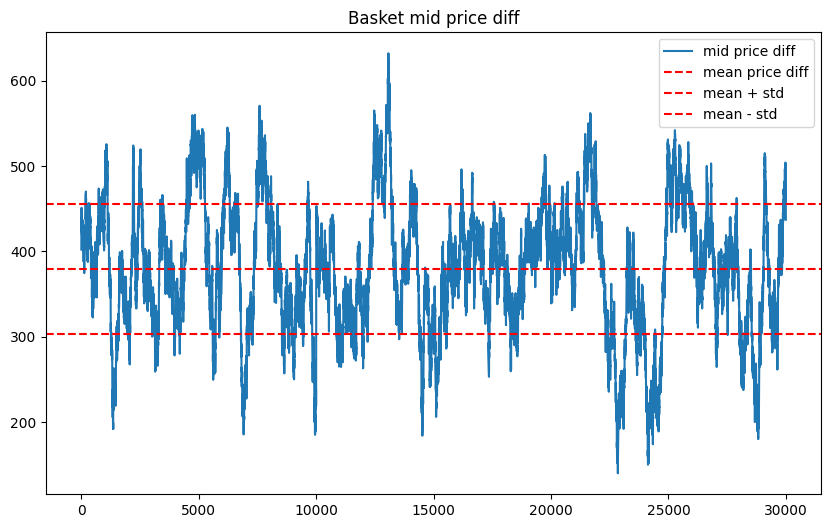

In [60]:
diff = merge["mid_price_basket"] - merge["sum_basket_price"]
mean_diff = diff.mean()
std_diff = diff.std()
print(f"mean mid price diff: {mean_diff}")
print(f"std mid price diff: {std_diff}")

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(diff, label="mid price diff")
plt.axhline(y=mean_diff, color='r', linestyle='--', label='mean price diff')
plt.axhline(y=mean_diff + std_diff, color='r', linestyle='--', label='mean + std')
plt.axhline(y=mean_diff - std_diff, color='r', linestyle='--', label='mean - std')
plt.title("Basket mid price diff")
plt.legend()
plt.show()

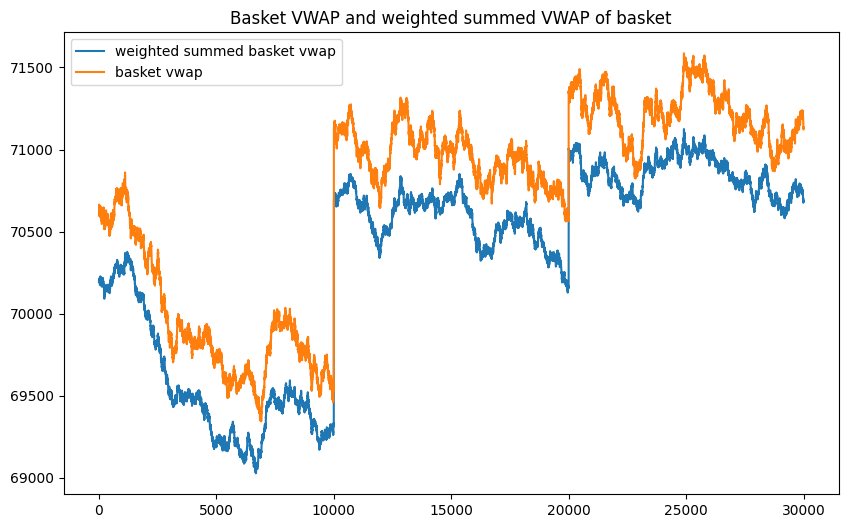

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(merge["sum_basket_vwap"], label="weighted summed basket vwap")
plt.plot(merge["vwap_basket"], label="basket vwap")

plt.title("Basket VWAP and weighted summed VWAP of basket")
plt.legend()

plt.show()

mean vwap diff: 379.4859530525008
std vwap diff: 76.41284777222181


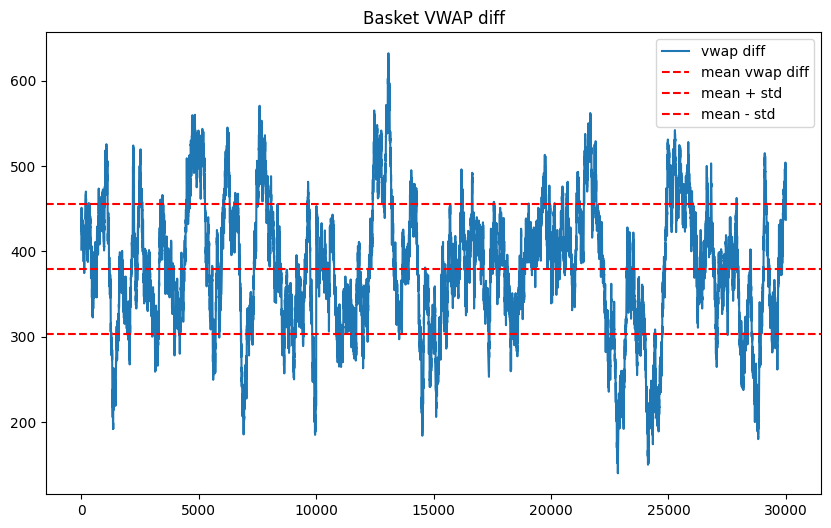

In [59]:
vwap_diff = merge["vwap_basket"] - merge["sum_basket_vwap"]
vwap_mean_diff = vwap_diff.mean()
vwap_std_diff = vwap_diff.std()
print(f"mean vwap diff: {vwap_mean_diff}")
print(f"std vwap diff: {vwap_std_diff}")

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(diff, label="vwap diff")
plt.axhline(y=vwap_mean_diff, color='r', linestyle='--', label='mean vwap diff')
plt.axhline(y=vwap_mean_diff + vwap_std_diff, color='r', linestyle='--', label='mean + std')
plt.axhline(y=vwap_mean_diff - vwap_std_diff, color='r', linestyle='--', label='mean - std')
plt.title("Basket VWAP diff")
plt.legend()
plt.show()